## Assignment-04

### Part I Review the online programming & Part1-2: Finish the Solution Parse Part of Edit-Distance
Please refer to [Lecture-04.ipynb](https://github.com/chromiumsilver/ai-for-nlp/tree/master/Week4/Lecture-04.ipynb)

### Part 2 Choose 1 - 2 books to keep reading: 

+ [ ] SICP, Structure and Interpretation of Computer Programming. 
+ [ ] Introduction to Algorithms 
+ [x] Artificial Intelligence A Modern Approach (3rd Edition) 
+ [x] Code Complete 2 
+ [ ] Programming Pearls 
+ [ ] Deep Learning
+ [ ] 黑快与画家
+ [ ] 数学之美
+ [ ] Fluent Python
+ [ ] Hands on Tensorflow
+ [ ] Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

### Part 3: Answer following questions: 

1. **Why do we need dynamic programming? What's the difference between dynamic programming and previous talked `search` problem?**
Dynamic programming is a general approach to solving problems, including search problem and optimization problem. Dynamic programming applies when a problem can be partitioned into overlapping subproblems. We solve each subproblem just once and save the solutions to subproblems in a table, avoiding any repetitive work. Dynamic programming can solve many problems in polynomial time for which a naive approach would take exponential or factorial time.

2. **Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?**
    * Machine learning requires massive, high-quality data sets to train on.
    * It takes time and computation power for machine learning algorithm to train in order to reach sufficient accuracy.
    * Dynamic programming can find the global optimal solution, while machine learning is only guaranteed to find local optimal solution in many cases.

3. **Can you catch up at least 3 problems which could solved by Dynamic Programming?**  
    * 瓷砖切割
    * 最优路径规划
    * DNA序列比对(sequence alignment)

4. **Can you catch up at least 3 problems wich could sloved by Edit Distance?**   
    * spell correction
    * evaluating machine translation and speech recognition
    * identify duplicates

5. **Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.**  
    * Analyze overlapping subproblems: break the original problem into subproblems
    * Save the solutions to subproblems: stored in a table, use a decorator in Python (lru_cache or custom one)
    * Construct an optimal solution from the optimal solutions of its subproblems

6. **What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)**  
    * storing solutions to subproblems consumes memory
    * no general formulation, every problems need to be solved in its own way.   

## Part 4 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

## (Optinal) Finish the k-person-salesman problem:

给定一个初始点 $P$, 已经 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短? 

In [1]:
import random
import numpy as np
from scipy.spatial import distance
import matplotlib.pylab as plt

In [2]:
latitudes = [random.randint(-100, 100) for _ in range(15)]
longitude = [random.randint(-100, 100) for _ in range(15)]

In [3]:
points = list(zip(latitudes, longitude))
points

[(86, 50),
 (73, 17),
 (-68, 35),
 (56, 4),
 (77, 13),
 (-66, -18),
 (15, -78),
 (76, 19),
 (-39, 4),
 (61, -31),
 (58, -23),
 (4, -74),
 (93, 54),
 (-23, -96),
 (-22, 15)]

In [4]:
start_point = random.randint(0, len(points)-1)
start_point

10

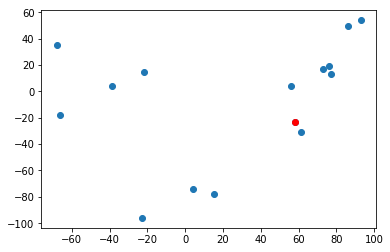

In [5]:
plt.scatter(latitudes, longitude)
plt.scatter([latitudes[start_point]], [longitude[start_point]], color='r');

### k=1

#### Greedy algorithm (approximation algorithm, may not find the optimal solution)
Time complexity: $O(n^2)$

In [6]:
def build_graph(points):
    """Represent the points and pair-wise distances in an adjacency matrix."""
    graph = distance.cdist(points, points, metric='euclidean')
    for i in range(len(graph)):
        graph[i][i] = float('inf')
    return graph

In [7]:
def greedy_shortest_path(s):
    """Return the shortest path given starting point s."""
    global points
    visited = set()
    path = []
    i = s
    while len(visited) < len(points):
        # print(visited)
        if i not in visited:
            visited.add(i) # mark point i as visited
            path.append(i) # update the shortest path
            next_i = get_nearest_point(i, visited) # visit the nearest point to i next
            i = next_i
    return path

In [8]:
def get_nearest_point(i, visited):
    """Compute the nearest point to the ith point that is not visited."""
    global points
    min_dist = float('inf')
    min_idx = 0
    for j in range(len(points)):
        if j in visited:
            continue
        if graph[i][j] < min_dist:
            min_dist = graph[i][j]
            min_idx = j
    return min_idx

In [9]:
graph = build_graph(points)
path = greedy_shortest_path(start_point)
coord_path = [points[i] for i in path]

In [10]:
min_dist = 0
for i in range(len(path)-1):
    min_dist += graph[path[i]][path[i+1]]
print('The length of shortest path: {}'.format(min_dist))

The length of shortest path: 535.0625182036587


10->9->3->1->7->4->0->12->14->8->5->2->11->6->13
(58, -23)->(61, -31)->(56, 4)->(73, 17)->(76, 19)->(77, 13)->(86, 50)->(93, 54)->(-22, 15)->(-39, 4)->(-66, -18)->(-68, 35)->(4, -74)->(15, -78)->(-23, -96)


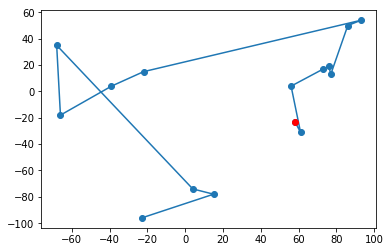

In [11]:
print('->'.join(map(str, path)))
print('->'.join(map(str, coord_path)))
plt.plot(*zip(*coord_path), '-o')
# plot the starting point in red
plt.plot([latitudes[start_point]], [longitude[start_point]], 'ro');

#### Dynamic programming
Time complexity: $O(n^2*2^n)$, space complexity: $O(n * 2^n)$

In [12]:
from functools import lru_cache

In [13]:
@lru_cache(maxsize=2**20)
def shortest_path(start, points):
    """Given the start point, compute the shortest path that visits all points exactly once.
    Args:
        start: int, the starting point
        points: tuple of all unvisited points
    Return:
        int: the length of shortest path
    """
    global solution
    
    if not points:
        solution[(start, ())] = -1 # mark the end of the path
        return 0 
    
    points_set = set(points) # note: set is not hashable 
    candidates = [(graph[start][i] + shortest_path(i, tuple(points_set - {i})), i) for i in points]
    
    shortest, next_idx = min(candidates, key=lambda x: x[0])
    solution[(start, points)] = next_idx
    # print(solution)
    return shortest

In [14]:
p_indices = set(range(len(points)))

In [15]:
solution = {}
min_dist = shortest_path(start_point, tuple(p_indices-{start_point}))
print('The length of shortest path: {}'.format(min_dist))

The length of shortest path: 477.16192522051125


In [ ]:
solution

In [17]:
def parse_solution(start, points):
    path = []
    point = start
    
    while point != -1:
        path.append(point)
        points = points - {point}
        next_point = solution[(point, tuple(points))] # next point in the path
        point = next_point 
        
    return path

In [18]:
dp_path = parse_solution(start_point, p_indices)
coord_path = [points[i] for i in dp_path]

10->9->6->11->13->5->2->8->14->3->4->1->7->0->12
(58, -23)->(61, -31)->(15, -78)->(4, -74)->(-23, -96)->(-66, -18)->(-68, 35)->(-39, 4)->(-22, 15)->(56, 4)->(77, 13)->(73, 17)->(76, 19)->(86, 50)->(93, 54)


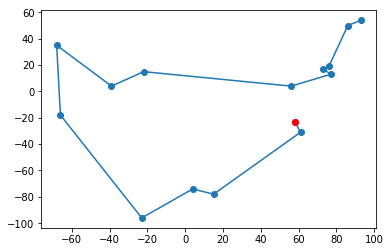

In [19]:
print('->'.join(map(str, dp_path)))
print('->'.join(map(str, coord_path)))
plt.plot(*zip(*coord_path), '-o')
plt.plot([latitudes[start_point]], [longitude[start_point]], 'ro');